<a href="https://colab.research.google.com/github/Nikita-Vasinkov/StatPrak-HW/blob/master/dz3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem 1
Implement serial test and apply to a `samples`

In [13]:
import numpy as np
from scipy import stats

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1

samples = [rng() for _ in range(1000)]

samples_samples = list(zip(samples[0::2], samples[1::2]))

f_obs = np.histogram(samples_samples, np.linspace(0, 1, 101))[0]
f_exp = np.full(100, len(samples) // 100)

print(f_exp, f_obs)

print(stats.chisquare(f_exp, f_obs))

[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10] [ 4 15 10  6  6  8 13 11 11  6  9 16 10  9 10 10 10 14 15 11 10 13  6 11
  8  8  8  9  9  5 10 10  8 11 12 14 11 10  7 11 11  5 16 10  9  9  4 13
 12 11 10 13 10  9  8  8 10  7 10 13  6  7  9 11  5  7  7 12 10 10 10  9
 10 12  5 14 14 13  9 16 12 15 13  8  2 11 12 13 15 10  8 15  7 13 13 10
 10 10  4 10]
Power_divergenceResult(statistic=135.236568986569, pvalue=0.009117451229848583)


### Problem 2*
Implement permutation test and apply to a `samples`

In [19]:
# Your code here
import numpy as np
from scipy import stats
from itertools import permutations

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1

def permutation_test(samples, d):
    n = len(samples) // d
    subseries = [samples[i*d:(i+1)*d] for i in range(n)]

    perms = list(permutations(range(d)))
    perm_dict = {perm: 0 for perm in perms}

    for series in subseries:
        indices = tuple(np.argsort(series))
        perm_dict[indices] += 1

    f_obs = np.array(list(perm_dict.values()))
    f_exp = np.full(len(perms), n / len(perms))

    chi2_stat, p_value = stats.chisquare(f_obs, f_exp)

    return chi2_stat, p_value, f_obs, f_exp

samples = [rng() for _ in range(1000)]
d = 5

chi2_stat, p_value, f_obs, f_exp = permutation_test(samples, d)

print(chi2_stat,p_value)

115.59999999999998 0.5711054902086635


### Problem 3

Provide a statistical test to show that `rng_bad` has problems but `rng_good` does not.

In [22]:
# Your code here
import numpy as np
from scipy import stats

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1

def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1

samples_good = [rng() for _ in range(1000)]
samples_bad = [rng_bad() for _ in range(1000)]

samples_samples_good = list(zip(samples_good[0::2], samples_good[1::2]))
samples_samples_bad = list(zip(samples_bad[0::2], samples_bad[1::2]))

f_obs_good = np.histogram(samples_samples_good, np.linspace(0, 1, 101))[0]
f_obs_bad = np.histogram(samples_samples_bad, np.linspace(0, 1, 101))[0]

f_exp = np.full(100, len(samples_good) // 100)

print(stats.chisquare(f_exp, f_obs_good))

print(stats.chisquare(f_exp, f_obs_bad))

Power_divergenceResult(statistic=135.236568986569, pvalue=0.009117451229848583)
Power_divergenceResult(statistic=159.73682148604746, pvalue=0.00010676060870452984)


### Problem 4
Simulate a sample of 1000 from a discrete distribution on a set of digits $0, 1, 2, \ldots, 9$ with weights $0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2$. Construct a histogram from the sample. Optimise the algorithm by ordering the weights.

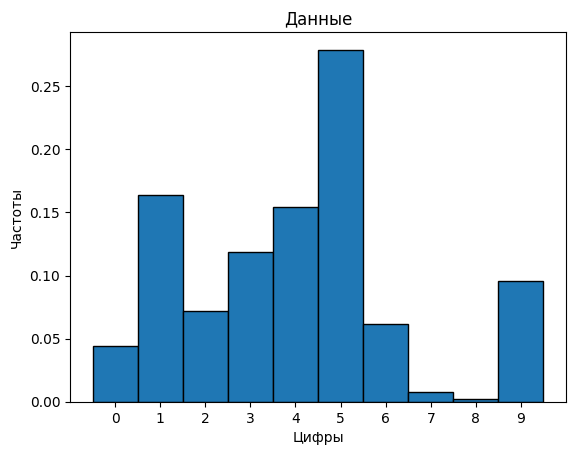

In [25]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt
import bisect

digits = np.arange(10)
new_weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])

new_weights /= new_weights.sum()

sorted_indices = np.argsort(new_weights)[::-1]
sorted_new_weights = new_weights[sorted_indices]
sorted_digits = digits[sorted_indices]

cumulative_new_weights = np.cumsum(sorted_new_weights)

num_samples = 1000
samples = []
for _ in range(num_samples):
    rand_num = np.random.rand()
    digit_index = bisect.bisect_left(cumulative_new_weights, rand_num)
    samples.append(sorted_digits[digit_index])

plt.hist(samples, bins=np.arange(11) - 0.5, edgecolor='black', density=True)
plt.xticks(range(10))
plt.xlabel('Цифры')
plt.ylabel('Частоты')
plt.title('Данные')
plt.show()


### Problem 5
Simulate a sample of size 1000 from the distribution $\operatorname{Exp}(\lambda)$ using the Inverse transform method. Construct a sample histogram and an accurate plot of the distribution density.

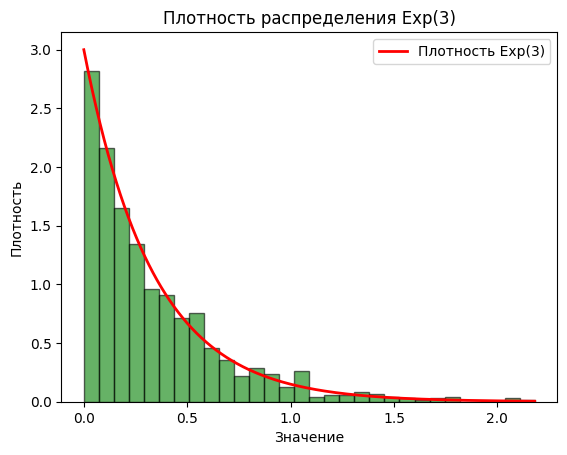

In [28]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt

a = 3

n_samples = 1000
u = np.random.rand(n_samples)
samples = -np.log(u) / a

plt.hist(samples, bins=30, edgecolor='black', density=True, alpha=0.6, color='g')

x = np.linspace(0, np.max(samples), 1000)
pdf = a * np.exp(-a * x)
plt.plot(x, pdf, 'r-', lw=2, label=f'Плотность Exp({a})')

plt.title('Плотность распределения Exp(3)')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()
plt.show()


### Problem 6
Justify (orally) that the accept-reject method really samples from the required distribution. Simulate $1000$ points from the distribution with density $e^xcos^2x \cdot \mathbb{I}_{[-\frac\pi2, \frac\pi2]}$. Plot the sampled histogram on the sample and compare it with the plot of the exact density function.

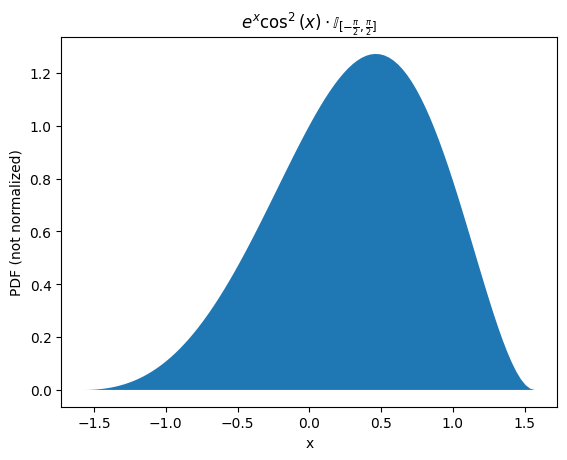

In [ ]:
fig = plt.figure()

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x) * np.cos(x) ** 2 # not normalized density!
plt.fill_between(x, 0, density)
plt.ylabel('PDF (not normalized)')
plt.xlabel('x')
plt.title(r'$e^x \cos^2(x) \cdot \mathbb{I}_{[-\frac{\pi}{2}, \frac{\pi}{2}]}$')

plt.show()

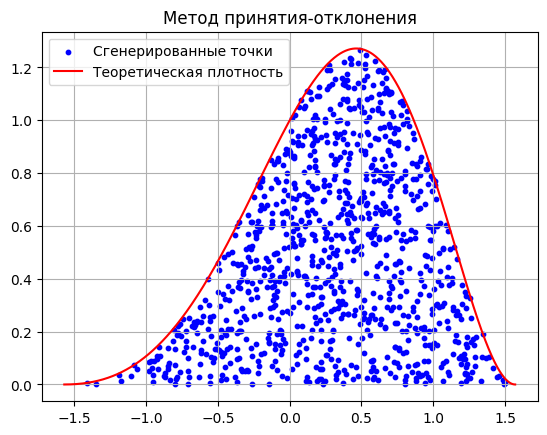

In [30]:

import numpy as np
import matplotlib.pyplot as plt

def target_density(x):
    return np.exp(x) * np.cos(x) ** 2

def uniform_density(x):
    return 1 / np.pi

x_values = np.linspace(-np.pi/2, np.pi/2, 1000)
max_ratio = np.max(target_density(x_values)) / uniform_density(x_values[0])

num_samples = 1000
sample_x = []
sample_y = []

while len(sample_x) < num_samples:
    x = np.random.uniform(-np.pi/2, np.pi/2)
    y = np.random.uniform(0, max_ratio * uniform_density(x))
    if y <= target_density(x):
        sample_x.append(x)
        sample_y.append(y)

sample_x = np.array(sample_x)
sample_y = np.array(sample_y)

plt.scatter(sample_x, sample_y, color='blue', label='Сгенерированные точки', s=10)

density = target_density(x_values)

plt.plot(x_values, density, 'r-', label='Теоретическая плотность')
plt.title('Метод принятия-отклонения')
plt.legend()
plt.grid(True)
plt.show()


### Problem 7
Model and depict a sample of 500 points uniformly distributed within a given triangle without using a selection method.

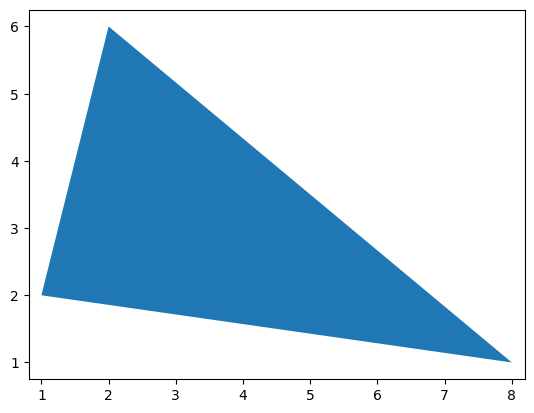

In [ ]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig = plt.figure()

polygon = Polygon(xy=np.array([[1, 2], [2, 6], [8, 1]]), closed=True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.axis('equal')
plt.show()

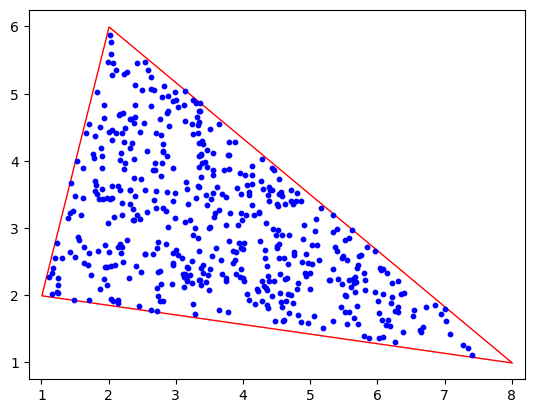

In [31]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

vertices = np.array([[1, 2], [2, 6], [8, 1]])

def generate_points_in_triangle(n_points, vertices):
    points = []
    while len(points) < n_points:
        u = np.random.rand()
        v = np.random.rand()
        if u + v <= 1:
            point = (1 - u - v) * vertices[0] + u * vertices[1] + v * vertices[2]
            points.append(point)
    return np.array(points)

n_points = 500
points = generate_points_in_triangle(n_points, vertices)

fig = plt.figure()

polygon = Polygon(vertices, closed=True, fill=None, edgecolor='r')
plt.gca().add_collection(PatchCollection([polygon], match_original=True))

plt.scatter(points[:, 0], points[:, 1], color='blue', s=10)
plt.axis('equal')
plt.show()


### Problem 8
Model without using the selection method a sample of $500$ points uniformly distributed inside the unit circle. Picture the obtained points. Do they really fill the circle uniformly?

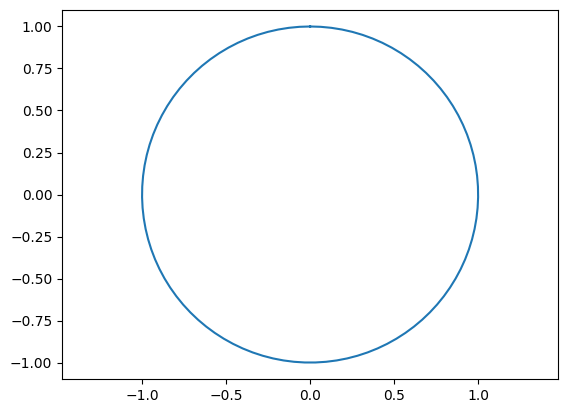

In [ ]:
fig = plt.figure()

t = np.linspace(0, 2*np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

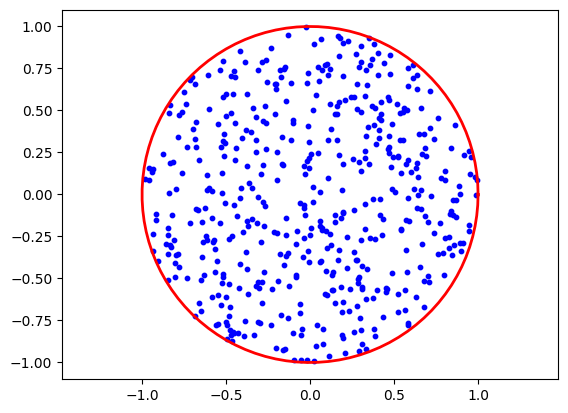

In [32]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt

n_points = 500

theta = np.random.uniform(0, 2 * np.pi, n_points)
r = np.sqrt(np.random.uniform(0, 1, n_points))

x = r * np.cos(theta)
y = r * np.sin(theta)

fig = plt.figure()
plt.scatter(x, y, color='blue', s=10)
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(t), np.sin(t), 'r-', lw=2)
plt.axis('equal')
plt.show()

### Problem 9
Prove (orally) that the following algorithm (**Box-Muller algorithm**, https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) generates a sample of independent $\mathcal{N}(0,1)$ random variables. Modify the method to exclude calls of trigonometric functions `np.sin` and `np.cos`. Using the modified method, simulate a sample size of $1000$ from a $2D$ Gaussian distribution with mean $\mu$ and covariance matrix $\Sigma$, where
$$\mu = \begin{pmatrix} 4 \\ 7 \end{pmatrix}^T, \quad \Sigma = \begin{pmatrix} 20 & -4 \\ -4 & 40 \end{pmatrix}.$$
Construct a 2D histogram of the resulting distribution. Compare the sample mean and covariance matrix with the exact values.

In [ ]:
import seaborn as sns

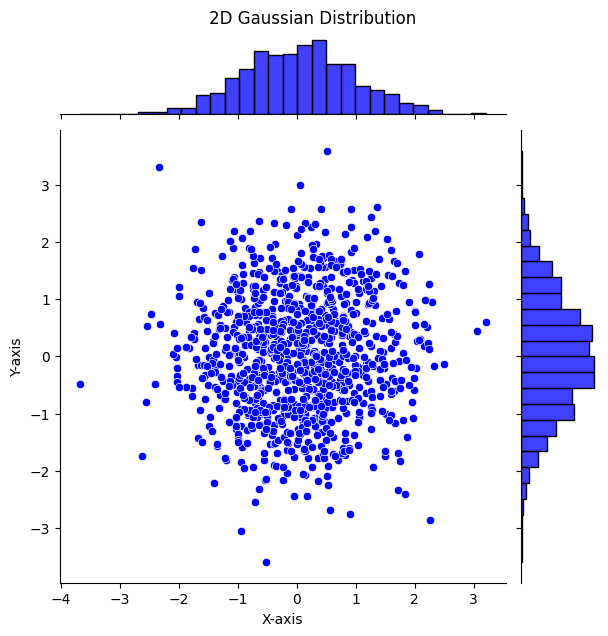

In [ ]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)


joint_plot = sns.jointplot(x=x, y=y, color="blue")
joint_plot.set_axis_labels('X-axis', 'Y-axis')
plt.suptitle('2D Gaussian Distribution', y=1.02)
plt.show()

[47.02776666  6.93198047] [[20.00204074 -3.35648611]
 [-3.35648611 39.52235391]]


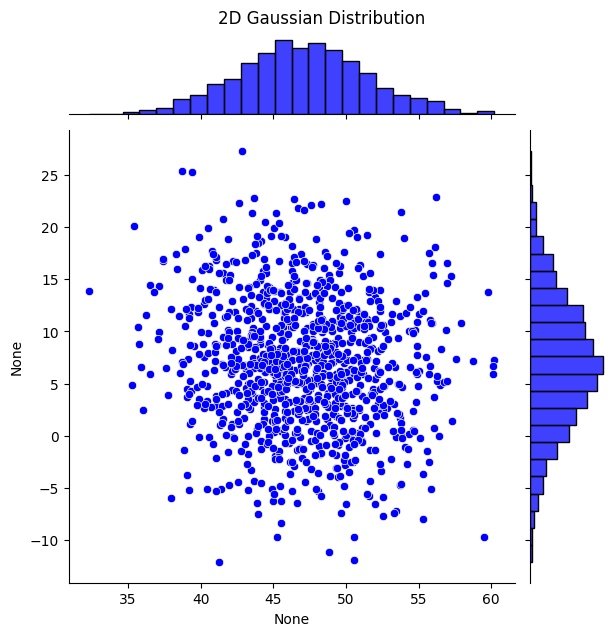

In [34]:
# Your code here
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

n = 1000
points = np.zeros((n, 2))
i = 0

while i < n:
    u1, u2 = np.random.uniform(-1, 1, 2)
    r = u1**2 + u2**2
    if r < 1:
        points[i, 0] = u1 * np.sqrt(-2 * np.log(r) / r)
        points[i, 1] = u2 * np.sqrt(-2 * np.log(r) / r)
        i += 1

mu = np.array([47, 7])
sigma = np.array([[20, -4], [-4, 40]])

L = np.linalg.cholesky(sigma)
X = mu + points @ L.T

mean = np.mean(X, axis=0)
cov = np.cov(X, rowvar=False)

print(mean, cov)

sns.jointplot(x=X[:, 0], y=X[:, 1], color="blue")
plt.suptitle('2D Gaussian Distribution', y=1.02)
plt.show()


### Problem 10*

Implement a method of generating a random partition of an n-element set into subsets. Use it to estimate the expected number of subsets in a random partition of a set of 100 elements.

Hint 1: Ширяев, Вероятность, т1, задача 2 к параграфу 1.

Hint 2: http://djalil.chafai.net/blog/2012/05/03/generating-uniform-random-partitions/

In [36]:
# Your code here
import numpy as np

def random_partition(n):
    subsets = []
    for element in range(1, n + 1):
        if not subsets:
            subsets.append([element])
        else:
            prob_new_subset = 1 / (len(subsets) + 1)
            if np.random.rand() < prob_new_subset:
                subsets.append([element])
            else:
                subset_index = np.random.randint(0, len(subsets))
                subsets[subset_index].append(element)
    return len(subsets)

def estimate_expected_subsets(n, num_simulations=10000):
    total_subsets = 0
    for _ in range(num_simulations):
        total_subsets += random_partition(n)
    return total_subsets / num_simulations

n = 100
expected_subsets = estimate_expected_subsets(n)
print(f"Ожидаемое количество подмножеств для множества из {n} элементов: {expected_subsets}")

Ожидаемое количество подмножеств для множества из 100 элементов: 13.4701
